## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [1]:
!pip install spacy

In [2]:
!pip install plotly

In [3]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

In [4]:
from wordcloud import WordCloud, STOPWORDS
from nltk import ngrams
import collections

In [5]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tusharbadhwar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tusharbadhwar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tusharbadhwar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
nlp=spacy.load("en_core_web_sm")

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [9]:
# Opening JSON file 
f = f = open('complaints.json','r')# Write the path to your data file and load it 
  
# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)

## Data preparation

In [10]:
# Inspect the dataframe to understand the given data.
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [12]:
df.shape

(78313, 22)

In [13]:
df.isnull().sum().sort_values(ascending=False)

_source.company_public_response      78309
_source.tags                         67413
_source.sub_issue                    46297
_source.sub_product                  10571
_source.zip_code                      6757
_source.state                         1991
_source.consumer_consent_provided     1008
_source.company                          0
_source.complaint_what_happened          0
_source.timely                           0
_source.date_sent_to_company             0
_source.submitted_via                    0
_index                                   0
_source.company_response                 0
_type                                    0
_source.consumer_disputed                0
_source.date_received                    0
_source.issue                            0
_source.complaint_id                     0
_score                                   0
_id                                      0
_source.product                          0
dtype: int64

In [14]:
#print the column names
print(df.columns)

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')


In [15]:
#Assign new column names
df.columns=['index', 'type', 'id', 'score', 'tags', 'zip_code',
       'complaint_id', 'issue', 'date_received',
       'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via',
       'date_sent_to_company', 'company_public_response',
       'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue',
       'consumer_consent_provided']

In [16]:
df.head()

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [17]:
#Assign nan in place of blanks in the complaints column
df.complaint_what_happened=df.complaint_what_happened.apply(lambda x: np.NaN if x=='' else x)

In [18]:
#Remove all rows where complaints column is nan
df_new=df[~pd.isnull(df.complaint_what_happened)]

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [19]:
# Write your function here to clean the text and remove all the unnecessary elements.
def data_preprocess(complaint_df):
    if(re.sub('\[\w*\]','',complaint_df)):
        complaint_df=re.sub('\[\w*\]','',complaint_df)


    if(re.sub(r'[^\w\s]', '', complaint_df)):
        complaint_df=re.sub(r'[^\w\s]', '', complaint_df)

    if(re.sub('\w*\d\w*','',complaint_df)):
        complaint_df=re.sub('\w*\d\w*','',complaint_df)
        
    return complaint_df.lower()


In [20]:
df_new.complaint_what_happened=df_new.complaint_what_happened.apply(data_preprocess)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
df_temp={'complaints':df_new.complaint_what_happened}
df_clean=pd.DataFrame(df_temp)

In [22]:
df_clean

,complaints
1,good morning my name is xxxx xxxx and i apprec...
2,i upgraded my xxxx xxxx card in and was told ...
10,chase card was reported on however fraudulent...
11,on while trying to book a xxxx xxxx ticket ...
14,my grand son give me check for i deposit it i...
...,...
78303,after being a chase card customer for well ove...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...
78310,i am not familiar with xxxx pay and did not un...
78311,i have had flawless credit for yrs ive had ch...


In [23]:
#Write your function to Lemmatize the texts
def word_lemmatize(sentence):
    doc=nlp(sentence)
    return (" ".join([token.lemma_ for token in doc]))

In [25]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 

In [24]:
df_clean['lemmatized complaints']=df_clean['complaints'].apply(word_lemmatize)  

In [25]:
df_clean

,complaints,lemmatized complaints
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...
...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...


In [26]:
#Write your function to extract the POS tags 

def pos_tag(text):
   list_1=[]
   tok_word=nltk.word_tokenize(text)
   for (wrd,tag) in nltk.pos_tag(tok_word):
     if tag=='NN':
       list_1.append(wrd)
   return (" ".join(list_1))







In [27]:
#this column should contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"].
df_clean['complaint_POS_removed']=df_clean['lemmatized complaints'].apply(pos_tag)

In [28]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaints,lemmatized complaints,complaint_POS_removed
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...
...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...,visa credit card provider claim purchase prote...
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,pay risk provide consumer bank app chase year ...
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...,credit yrs credit card chase freedom xxxx prob...


## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




Text(0, 0.5, 'Frequency')

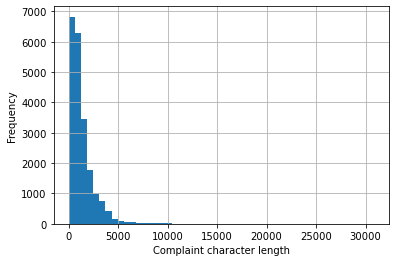

In [29]:
# Write your code here to visualise the data according to the 'Complaint' character length
df_clean['complaints'].str.len().hist(bins=50)
plt.xlabel('Complaint character length')
plt.ylabel('Frequency')

#### Find the top 40 words by frequency among all the articles after processing the text.

In [30]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
all_complaints = ' '.join(df_clean['complaint_POS_removed'].str.lower())

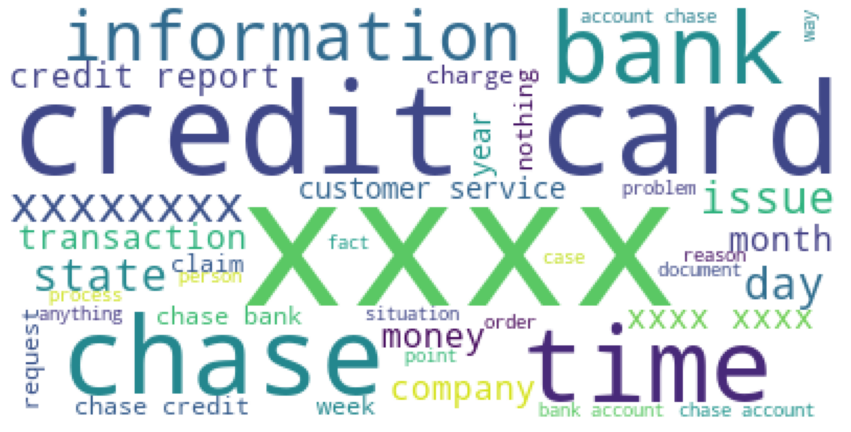

In [31]:
from matplotlib import rcParams

stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=40).generate(all_complaints)
rcParams['figure.figsize'] = 15, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [32]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

account 47521
chase 46576
xxxx 36590
credit 34158
card 29276
bank 28419
payment 21140
time 16050
charge 14994
day 12955
xxxxxxxx 12404
money 11943
check 11573
loan 11003
state 9673
letter 9669
information 9660
report 8921
transaction 8656
fee 8635
number 8627
month 8464
year 8281
mortgage 8192
customer 8164
claim 7861
balance 7745
phone 7718
service 7676
company 7613


<AxesSubplot:title={'center':'Top 30 words after processing the text'}, xlabel='complaint_text'>

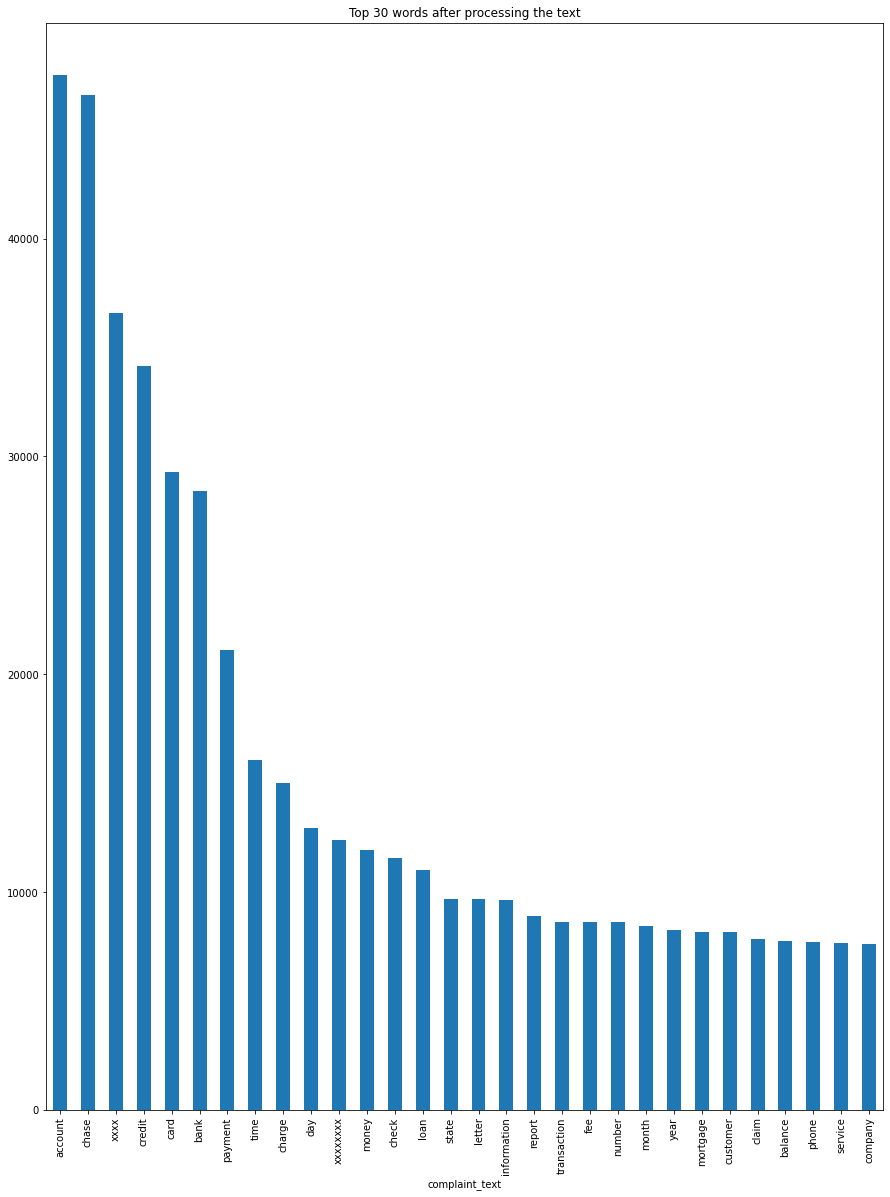

In [33]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_clean['complaint_POS_removed'], 30)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['complaint_text' , 'count'])
df2.groupby('complaint_text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 30 words after processing the text')

In [34]:
#Print the top 10 words in the unigram frequency
for i,j in common_words[:10]:
    print(i," : ",j)

account  :  47521
chase  :  46576
xxxx  :  36590
credit  :  34158
card  :  29276
bank  :  28419
payment  :  21140
time  :  16050
charge  :  14994
day  :  12955


credit card 12783
credit report 3976
xxxx xxxx 3942
customer service 3081
chase credit 2964
chase bank 2926
bank account 2753
account chase 2590
chase account 2416
account account 2391
account bank 1749
check account 1690
card account 1598
debit card 1561
credit score 1541
checking account 1519
account credit 1484
money account 1363
payment payment 1341
account xxxx 1301
card chase 1295
xxxx chase 1271
phone number 1266
business day 1262
credit account 1236
charge account 1215
account number 1176
xxxx account 1169
card company 1123
card card 1081


<AxesSubplot:title={'center':'Top 30 bigrams in Complaints after processing data'}, xlabel='Complaint_Bigram'>

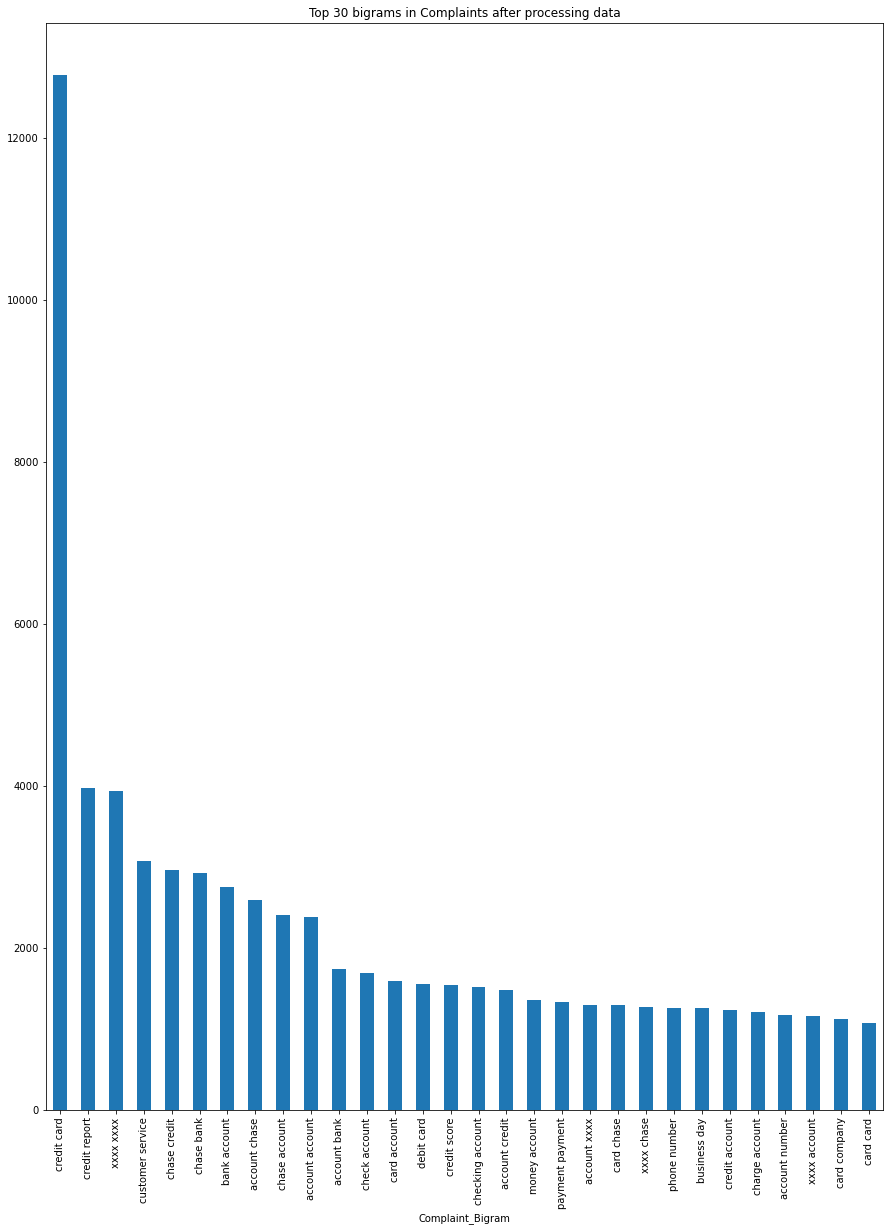

In [35]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

    
common_bigrams = get_top_n_bigram(df_clean['complaint_POS_removed'], 30)
for word, freq in common_bigrams:
    print(word, freq)
df3 = pd.DataFrame(common_bigrams, columns = ['Complaint_Bigram' , 'count'])
df3.groupby('Complaint_Bigram').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 30 bigrams in Complaints after processing data')

In [36]:
#Print the top 10 words in the bigram frequency
for word, freq in common_bigrams[:10]:
    print(word, freq)

credit card 12783
credit report 3976
xxxx xxxx 3942
customer service 3081
chase credit 2964
chase bank 2926
bank account 2753
account chase 2590
chase account 2416
account account 2391


chase credit card 2062
credit card account 1025
credit card company 992
credit card chase 631
credit card credit 518
inquiry credit report 480
charge credit card 421
xxxx xxxx xxxx 412
account credit card 398
card credit card 391
credit reporting agency 371
credit card bank 361
bank credit card 349
credit report credit 347
xxxx credit card 333
credit reporting act 328
credit card charge 307
credit card payment 294
account credit report 288
credit card xxxx 277
credit card card 261
credit card balance 260
account chase account 257
chase customer service 247
consumer protection bureau 247
victim identity theft 244
credit card service 238
payment credit card 235
freedom credit card 232
credit card statement 222


<AxesSubplot:title={'center':'Top 30 trigrams in complaints after processing data'}, xlabel='complaint_trigrams'>

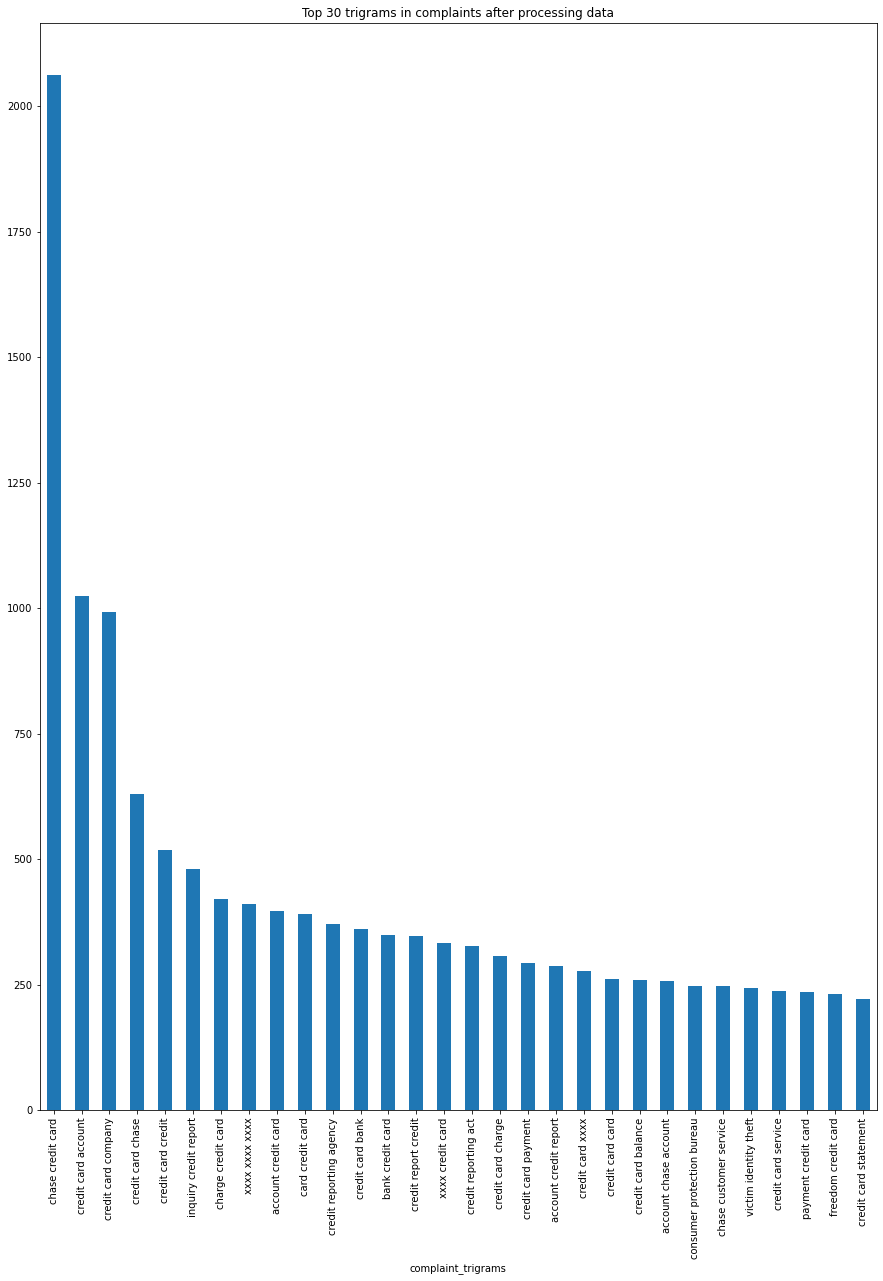

In [37]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



common_trigrams = get_top_n_trigram(df_clean['complaint_POS_removed'], 30)
for word, freq in common_trigrams:
    print(word, freq)
df4 = pd.DataFrame(common_trigrams, columns = ['complaint_trigrams' , 'count'])
df4.groupby('complaint_trigrams').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 30 trigrams in complaints after processing data')


In [38]:
#Print the top 10 words in the trigram frequency
for word, freq in common_trigrams[:10]:
    print(word, freq)

chase credit card 2062
credit card account 1025
credit card company 992
credit card chase 631
credit card credit 518
inquiry credit report 480
charge credit card 421
xxxx xxxx xxxx 412
account credit card 398
card credit card 391


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [39]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [40]:
#All masked texts has been removed
df_clean

,complaints,lemmatized complaints,complaint_POS_removed,Complaint_clean
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...
...,...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...,card customer decade solicitation credit card ...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...,visa credit card provider claim purchase prote...,visa credit card provider claim purchase prote...
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,pay risk provide consumer bank app chase year ...,pay risk provide consumer bank app chase year ...
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...,credit yrs credit card chase freedom xxxx prob...,credit yrs credit card chase freedom problem ...


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [41]:
all_complaints = [i for i in df_clean['Complaint_clean']]

In [42]:
#Write your code here to initialise the TfidfVectorizer 

vectorizer = TfidfVectorizer(max_df=0.95,min_df=2)


#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [43]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
tfidf_model = vectorizer.fit_transform(all_complaints)
tfidf = pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())
tfidf

,aa,aarp,ab,abandon,abandonment,abatement,abbreviation,abd,abide,ability,...,yrs,ys,ytd,zelle,zero,zip,zipcode,zombie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.160974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [44]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [45]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5 #write the value you want to test out

#keep the random_state =40
nmf_model =  NMF(n_components=num_topics,random_state=40)#write your code here
nmf_model.fit(tfidf_model)
W = nmf_model.fit_transform(tfidf_model)  # Document-topic matrix
H = nmf_model.components_       # Topic-term matrix

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



In [46]:
#Print the Top15 words for each of the topics
words = np.array(vectorizer.get_feature_names())
topic_words = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)
for i in range(num_topics):
    ix = H[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,bank,check,money,fund,chase,deposit,branch,day,number,business,transaction,checking,claim,customer
Topic 2,credit,card,report,inquiry,chase,account,score,company,limit,information,debt,application,letter,year,reporting
Topic 3,payment,balance,interest,month,fee,statement,amount,day,time,bill,auto,date,pay,credit,account
Topic 4,charge,card,chase,transaction,dispute,fee,merchant,fraud,purchase,claim,service,amount,time,interest,refund
Topic 5,loan,mortgage,home,modification,chase,property,year,letter,time,document,rate,house,bank,foreclosure,sale


In [47]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_model=nmf_model.transform(tfidf_model)

In [48]:
topic_model.argmax(axis=1)

array([0, 1, 1, ..., 3, 2, 2])

In [49]:
#Assign the best topic to each of the cmplaints in Topic Column

df_clean['Topic'] = topic_model.argmax(axis=1)#write your code to assign topics to each rows.

In [50]:
df_clean.head()

,complaints,lemmatized complaints,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,1
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...,1
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,1
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,0


In [51]:
#Print the first 5 Complaint for each of the Topics
pd.set_option('display.max_colwidth', None)
df_clean.groupby('Topic').head(5).sort_values('Topic').iloc[:,3:]

,Complaint_clean,Topic
1,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,0
14,son chase account fund bank account pay money son check money bank refuse money son call chase time check owner country time date check number claim number chase,0
17,jp chase account debit card tuesday thursday branch customer service representative account branch fund deposit place employment bank associate customer service assure fund business day saturday branch fund look account fund statement business day state tuesday date fund bank check business day fund account bind fee rent car payment etc notice thing peace mind fact chase situation bank teller inform account look chase right account time protocol notice form document shore notice thing peace mind fact chase situation bank teller inform account look chase right account time protocol notice form document situation livelihood,0
24,mishandle account auto,0
27,account bank code bonus term everything account deposit bonus day deposit account coupon code apply day bonus,0
2,card agent upgrade date agent information order account change date consent recording agent,1
10,card report application identity consent service credit identity applicant,1
11,try book ticket offer ticket card information offer minute screen decision bank chase bank notification screen chase representative application state information offer credit offer account statement use ticket account application representative oblige put application explicit request application chase chase fact credit account name report credit report chase information credit report application error,1
15,inquiry,1
23,chase credit card datum credit report company issue,1


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [52]:
#Create the dictionary of Topic names and Topics

Topic_names = { 
              0:"Bank Account services",
              1:"Credit card or prepaid card",
              2:"Others",
              3:"Theft/Dispute Reporting",
              4:"Mortage/Loan" }

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [53]:
df_clean

,complaints,lemmatized complaints,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,Bank Account services
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent upgrade date agent information order account change date xxxxxxxx consent xxxx recording agent,card agent upgrade date agent information order account change date consent recording agent,Credit card or prepaid card
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card report application identity consent service credit identity applicant,card report application identity consent service credit identity applicant,Credit card or prepaid card
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fac

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [54]:
#Create the dictionary again of Topic names and Topics

Topic_names = { "Bank Account services":0,
              "Credit card or prepaid card":1,
              "Others":2,
              "Theft/Dispute Reporting":3,
              "Mortage/Loan":4 }
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [55]:
df_clean

,complaints,lemmatized complaints,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,0
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent upgrade date agent information order account change date xxxxxxxx consent xxxx recording agent,card agent upgrade date agent information order account change date consent recording agent,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card report application identity consent service credit identity applicant,card report application identity consent service credit identity applicant,1
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being repo

In [56]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=df_clean[['complaints','Topic']]

In [57]:
training_data

,complaints,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,0
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,1
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,1
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,0
...,...,...
78303,after being a chase card customer for well over a decade was offered multiple solicitations for acquiring new credit cards with chase all with bonus airline miles and hotel points was approved for all new cards with no annual fee for year after less than months with payment always paid as agreed chase closed all my cards one of my approved new cards was never activated but was sent to me\n\nchase has done harm to my credit has charged me an annual fee even though they cancelled my account failed to credit my points for both airlines and hotel failed to credit up to for xxxx enrollment and failed to credit airline charge as agreed upon,1
78309,on wednesday xxxxxxxx i called chas my xxxx xxxx visa credit card provider and asked how to make a claim under their purchase protection benefit on xxxxxxxx i purchased three high school textbooks for my xxxx year old daughter because she transferred to a new school all three books were damaged when a water bottle in her backpack broke the chase representative assured me the textbooks w

####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [59]:

#Write your code to get the Vector count
cvectorizer=CountVectorizer()
vector_complaints=cvectorizer.fit_transform(training_data['complaints'])

#Write your code here to transform the word vector to tf-idf
tfidftransformer=TfidfTransformer()
tfidf_complaints=tfidftransformer.fit_transform(vector_complaints)

#Write your code here to transform the word vector to tf-idf

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [60]:
# Write your code here to build any 3 models and evaluate them using the required metrics
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [61]:
X_train,X_test,y_train,y_test=train_test_split(tfidf_complaints,training_data['Topic'],train_size=0.7)

In [62]:
model=LogisticRegression(random_state=42)

In [63]:
## Fitting the model
model=model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [64]:
##Preedicting on the test data
y_test_pred=model.predict(X_test)

In [65]:
## Accuracy obtained
print("Accuracy on test data",metrics.accuracy_score(y_test,y_test_pred))

Accuracy on test data 0.926763682378994


In [66]:
##Tuning the parameters
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space,
              'solver':['liblinear'],
             'max_iter':[100,1000,2000]}

In [67]:
logreg_cv = GridSearchCV(model, param_grid, cv = 5,n_jobs=-1,verbose=True)
  
logreg_cv=logreg_cv.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


In [68]:
logreg_cv.best_estimator_

LogisticRegression(C=3.727593720314938, random_state=42, solver='liblinear')

In [69]:
logreg_cv=logreg_cv.best_estimator_

### Model evaluation

In [70]:
## Accuracy on tuned model
print("Accuracy after hyperparameter tuning on train set:",metrics.accuracy_score(y_train,logreg_cv.predict(X_train)))
print("Accuracy after hyperparameter tuning on test set:",metrics.accuracy_score(y_test,logreg_cv.predict(X_test)))

Accuracy after hyperparameter tuning on train set: 0.9857627118644068
Accuracy after hyperparameter tuning on test set: 0.9262891490034799


In [71]:
##ROC_AUC score on test data
print("ROC_AUC score on test data:",metrics.roc_auc_score(y_test,logreg_cv.predict_proba(X_test),multi_class='ovr'))

ROC_AUC score on test data: 0.9946822294693591


In [72]:
##Precision,Recall score for the above topics
print(metrics.classification_report(y_test,y_test_pred,target_names=["Bank account services", "Credit card / Prepaid card", "Others", "Theft/Dispute reporting", "Mortgages/loans"]))

                            precision    recall  f1-score   support

     Bank account services       0.93      0.95      0.94      1599
Credit card / Prepaid card       0.93      0.93      0.93      1477
                    Others       0.96      0.85      0.90       655
   Theft/Dispute reporting       0.90      0.92      0.91      1440
           Mortgages/loans       0.94      0.94      0.94      1151

                  accuracy                           0.93      6322
                 macro avg       0.93      0.92      0.92      6322
              weighted avg       0.93      0.93      0.93      6322



### Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [74]:
tree_model=DecisionTreeClassifier(random_state=42)

In [75]:
##Fitting the model
tree_fit=tree_model.fit(X_train,y_train)

In [76]:
y_test_pred=tree_fit.predict(X_test)

In [77]:
print("Accuracy of decision tree before tuning",metrics.accuracy_score(y_test,y_test_pred))

Accuracy of decision tree before tuning 0.7798165137614679


In [78]:
params={'min_samples_leaf':[2,5,6,7],
        'min_samples_split':[10,15,20,25,30],
        'max_depth':[6,8,10,12,15]
}

In [79]:
### Hyperparameter tuning using randomizedsearchCV
Decisionclassifier=RandomizedSearchCV(tree_model,params,n_jobs=-1,cv=5,verbose=True)

In [80]:
## Fitting on the best parameter
Decisionclassifier=Decisionclassifier.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [81]:
Decisionclassifier.best_estimator_

DecisionTreeClassifier(max_depth=15, min_samples_leaf=6, min_samples_split=30,
                       random_state=42)

In [82]:
Decisionclassifier=Decisionclassifier.best_estimator_

### Model evaluation

In [83]:
y_train_pred=Decisionclassifier.predict(X_train)

In [84]:
y_test_pred=Decisionclassifier.predict(X_test)

In [85]:
## Accuracy on test data
print("Accuracy on decision tree on train set after tuning",metrics.accuracy_score(y_train,y_train_pred))
print("Accuracy on decision tree on test set after tuning",metrics.accuracy_score(y_test,y_test_pred))
print("ROC_AUC score on test set ",metrics.accuracy_score(y_test,y_test_pred))

Accuracy on decision tree on train set after tuning 0.8574237288135593
Accuracy on decision tree on test set after tuning 0.7837709585574185
ROC_AUC score on test set  0.7837709585574185


In [86]:
## classification report
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1599
           1       0.80      0.81      0.81      1477
           2       0.74      0.76      0.75       655
           3       0.78      0.69      0.74      1440
           4       0.74      0.82      0.78      1151

    accuracy                           0.78      6322
   macro avg       0.78      0.78      0.78      6322
weighted avg       0.78      0.78      0.78      6322



## Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
randomforest=RandomForestClassifier(random_state=42)

In [89]:
randomforest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [90]:
y_test_pred=randomforest.predict(X_test)

In [91]:
## Accuracy on the untuned randomforest classifier
print("Accuracy before tuning",metrics.accuracy_score(y_test,y_test_pred))

Accuracy before tuning 0.823473584308763


In [92]:
params={'min_samples_leaf':[3,5,8,10,12,20,25],
        'min_samples_split':[1,2,5,10,15,20,30],
        'max_depth':[20,18,17,16,15,10,5,4,3]
}

In [93]:
## Using randomizedsearch CV to identify the best params 

forest_classifier=RandomizedSearchCV(randomforest,params,n_jobs=-1,verbose=True,cv=3)

In [94]:
forest_classifier=forest_classifier.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [95]:
forest_classifier=forest_classifier.best_estimator_

### Model Evaluation

In [96]:
y_train_pred=forest_classifier.predict(X_train)

In [97]:
y_test_pred=forest_classifier.predict(X_test)

In [98]:
## Accuracy on test data
print("Random Forest Classifier Model Results:")
print("Accuracy on decision tree on train set after tuning",metrics.accuracy_score(y_train,y_train_pred))
print("Accuracy on decision tree on test set after tuning",metrics.accuracy_score(y_test,y_test_pred))
print("ROC_AUC score on test set ",metrics.accuracy_score(y_test,y_test_pred))

Random Forest Classifier Model Results:
Accuracy on decision tree on train set after tuning 0.7970847457627118
Accuracy on decision tree on test set after tuning 0.755931667193926
ROC_AUC score on test set  0.755931667193926


In [99]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1599
           1       0.70      0.83      0.76      1477
           2       0.94      0.12      0.22       655
           3       0.76      0.80      0.78      1440
           4       0.86      0.77      0.81      1151

    accuracy                           0.76      6322
   macro avg       0.80      0.68      0.68      6322
weighted avg       0.78      0.76      0.73      6322



## Overall model evaluation

-  <b>Logisitic Regression model</b>:Accuracy score and ROC AUC score of Logistic regression on both the test and train data after hyperparameter tuning is high, with the test data accuracy at 92%, meaning a perfect balance of bias-variance. Hence a logistic model with hyperparameter tuning would work the best in this case

- <b>Decision tree classifier</b>: Accuracy and ROC AUC score of this model is between 70-80% for both the test and training dataset, implying low variance and higher bias, hence the accuracy might decrease on more unseen dataset

- <b>Random forest classifier</b>: This model performs similarly to the Decision tress classfier, and may not perform very well on future unseen datasets as it has low variance and high bias.